Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [1]:
NAME = "Maciej Wilhelmi"

---

# 0. Wprowadzenie

W trakcie dzisiejszego laboratorium zbadamy różne architektury sieci neuronowych i ich odporność na transformacje (symetrie) danych wejściowych. W tym celu wykorzystamy znane już podejście autokodera, który będzie uczony na zbiorze danych odręcznie pisanych cyfr – MNIST.

## 0.1. Zbiór MNIST
Przygotowana została klasa `SampledMNISTData`, która pozwoli na używanie: (1) pełnego zbioru (parametr `num_samples_per_class = -1`) lub (2) losowego podzbioru instancji (parametr `num_samples_per_class > 0`).

Poniższy fragment kodu wizualizuje losowo wybrane instancje ze zbioru MNIST. Każdy obrazek jest tensorem wymiaru `(1, 28, 28)`, tzn. obrazki są wymiaru 28x28 pikseli oraz są zapisane w skali szarości (1 kanał).

## 0.2. Modele

Modele oraz zbiór danych zostały zaimplementowane w bibliotece PyTorch, przy czym na etapie uczenia modeli wykorzystany został PyTorch-Lightning, który znacznie upraszcza proces uczenia modeli (wrócimy do tego później).

Ze względu czas uczenia poszczególnych modeli oraz ograniczenia czasowe podczas laboratorium, wykorzystywane modele zostały już przeuczone. Kod znajduje się w odpowiednich zeszytach. Właściwa część laboratorium będzie korzystać z tych wyuczonych modeli.

In [2]:
from src.dataset import SampledMNISTData

mnist = SampledMNISTData()

100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 21652775.75it/s]


Extracting ./data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 27562160.14it/s]

Extracting ./data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw



100%|███████████████████████████| 1648877/1648877 [00:00<00:00, 18143993.04it/s]

Extracting ./data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw


100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1491585.40it/s]

Extracting ./data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw



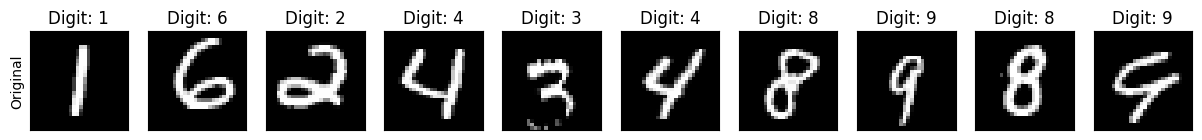

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch


def visualize_random_sample(dataset, num_samples: int = 10, seed: int = 42):
    np.random.seed(seed)
    indices = np.random.choice(range(len(dataset)), size=num_samples)
    
    fig, axs = plt.subplots(ncols=num_samples, figsize=(15, 5))
    
    axs[0].set(ylabel="Original")
    
    for i, sample_idx in enumerate(indices):
        org_img, label = dataset[sample_idx]
        axs[i].imshow(org_img[0], cmap="gray")
        axs[i].set(title=f"Digit: {label}", xticks=[], yticks=[])
            
            

    
visualize_random_sample(dataset=mnist.mnist_test)